In [1]:
import pandas as pd
import numpy as np
import os


current_dir = os.getcwd()

In [2]:
# get data dir, go one folder back
data_dir = os.path.abspath(os.path.join(current_dir, os.pardir, 'data'))

In [3]:
# read C:\Users\pablo\OneDrive\Desktop\tree_traits\data\Estimated_trait_table_with_monos.csv
df_trait = pd.read_csv('C:\\Users\\pablo\\OneDrive\\Desktop\\tree_clustering\\data\\Estimated_trait_table_with_monos.csv')
# df_trait[df_trait[['accepted_bin', 'trait']].duplicated()]

In [4]:
# pivot using accepted_bin as index
df_trait_pred = df_trait.pivot_table(index='accepted_bin', columns='trait', values='pred_value', aggfunc='mean')
df_trait_obs = df_trait.pivot_table(index='accepted_bin', columns='trait', values='obs_value', aggfunc='mean')



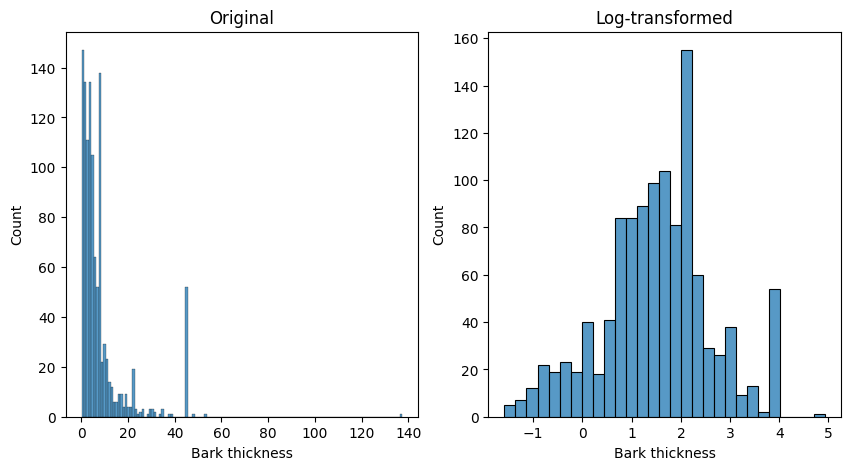

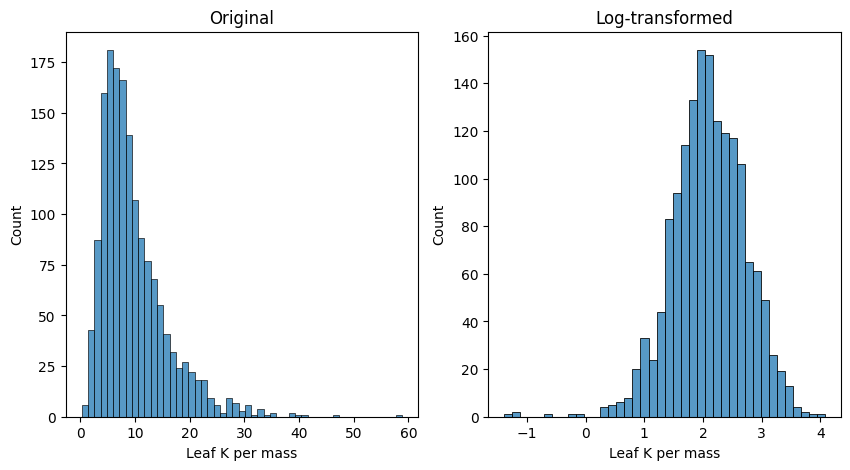

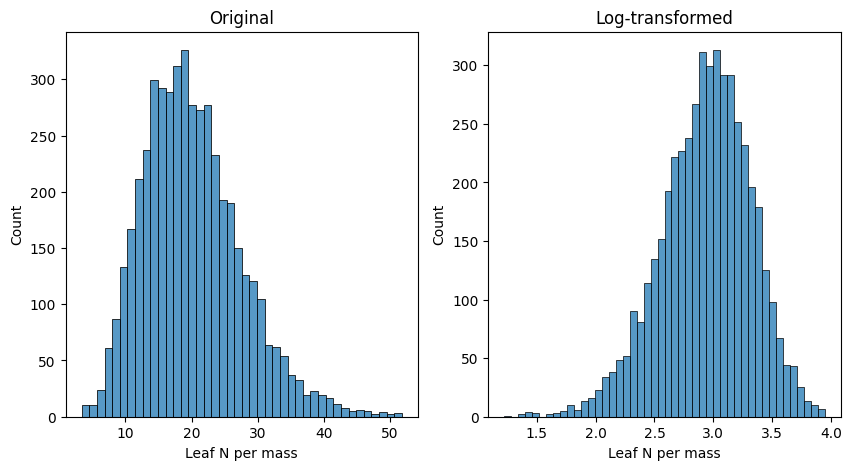

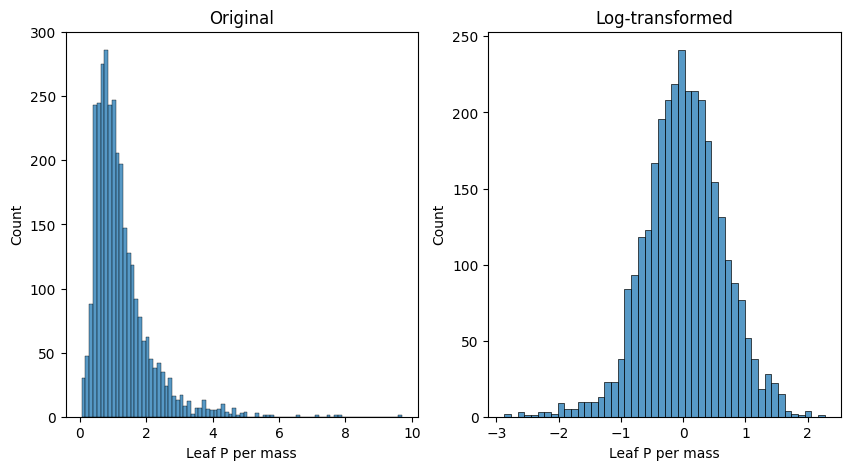

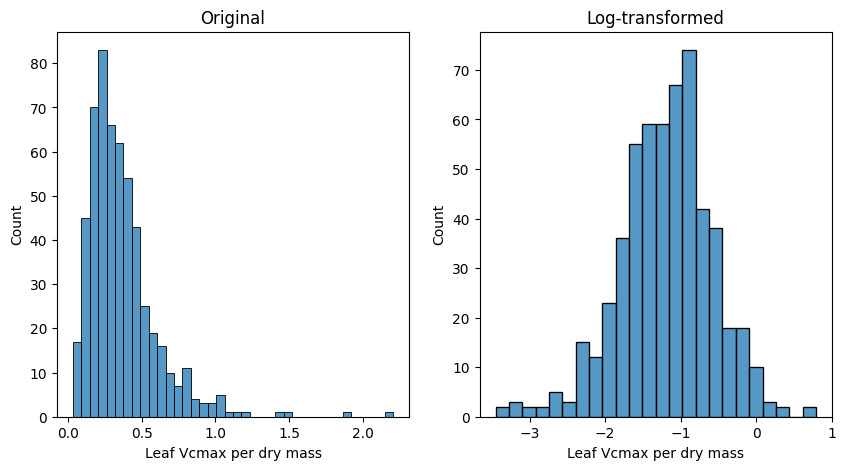

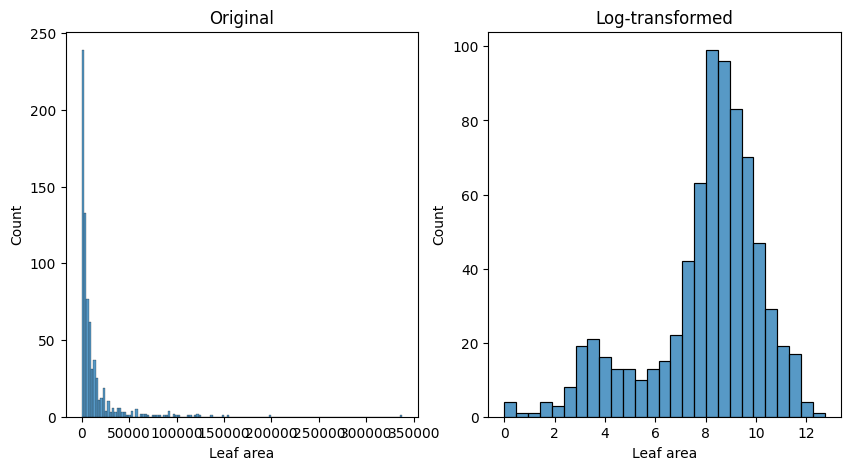

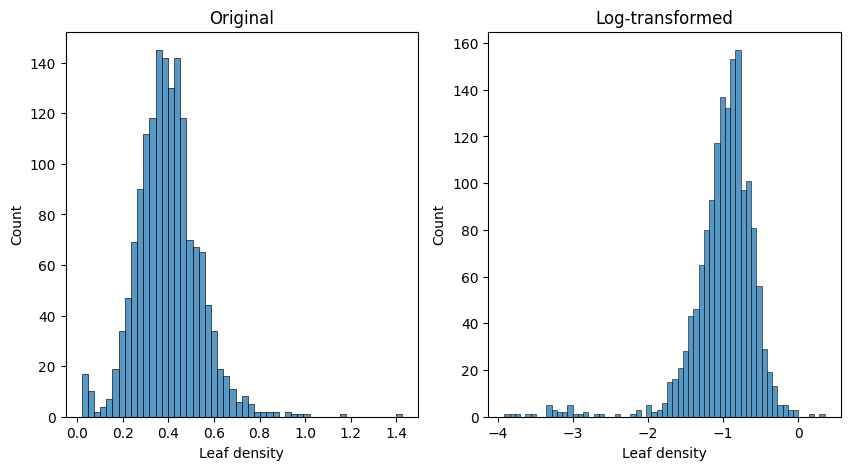

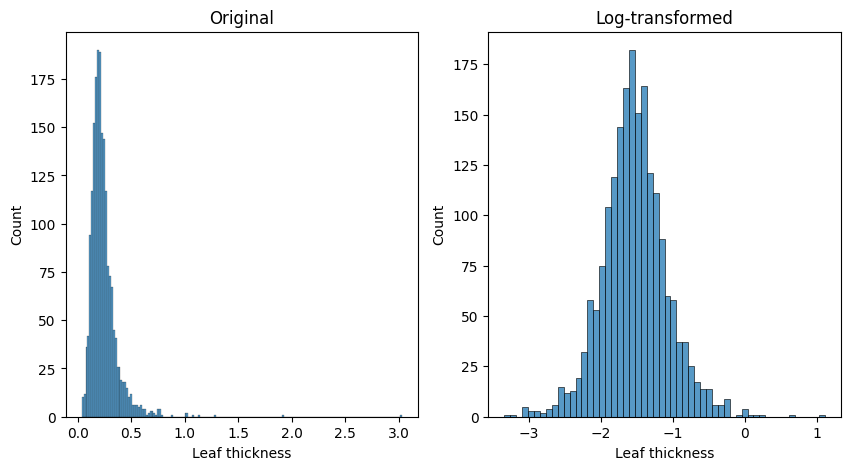

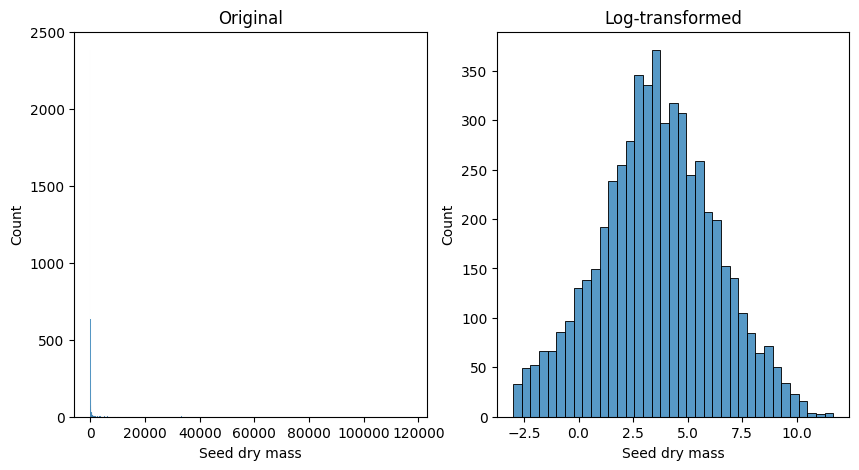

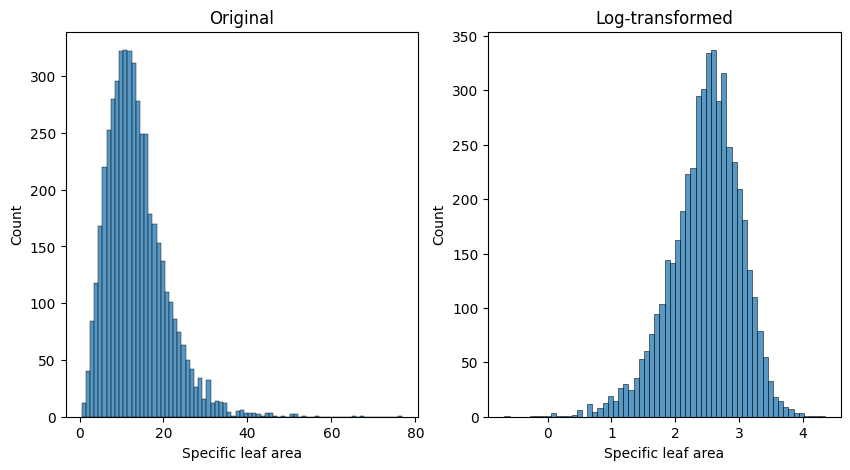

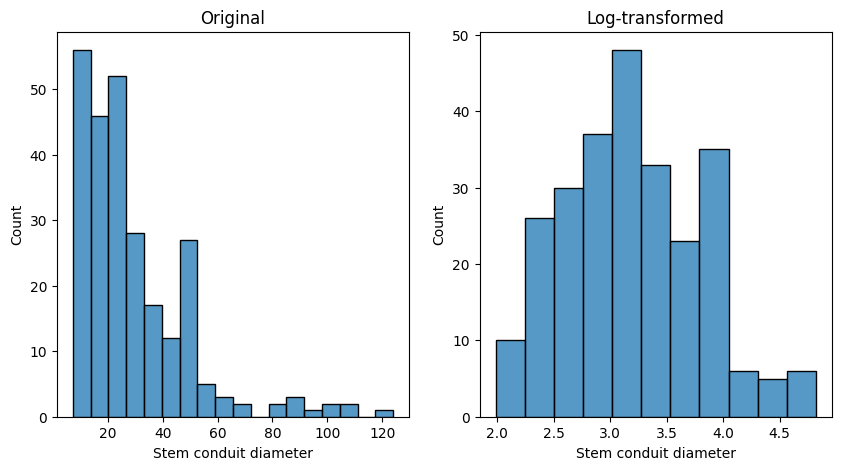

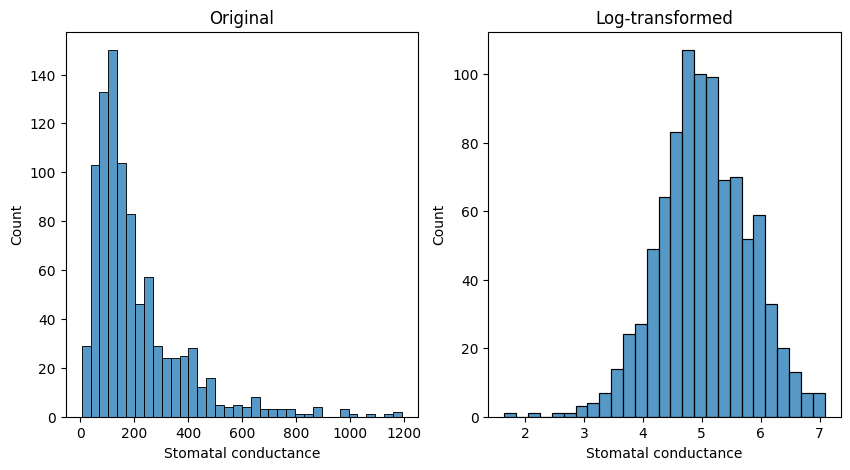

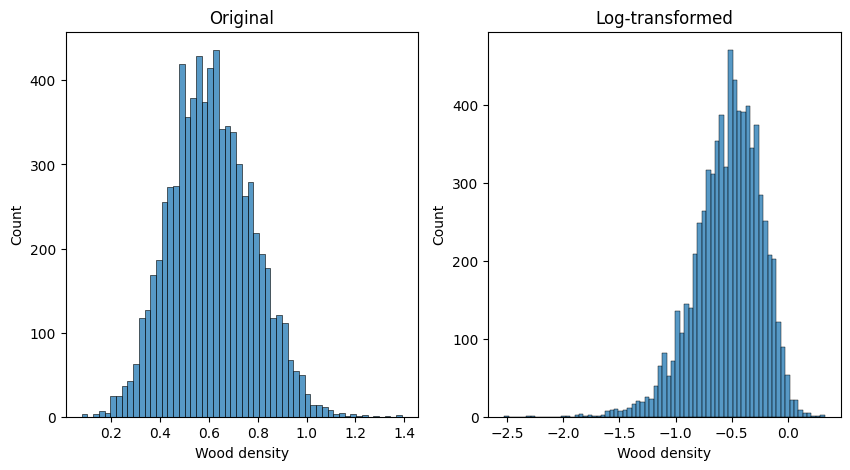

In [5]:
# plot distribution for each column in df_trait_obs
import matplotlib.pyplot as plt
import seaborn as sns

for col in df_trait_obs.columns:

    # create a figure with two columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # show original
    sns.histplot(df_trait_obs[col].dropna(), ax = axs[0])
    # show log-transform
    sns.histplot(np.log(df_trait_obs[col].dropna()), ax = axs[1])
    # title for axs
    axs[0].set_title('Original')
    axs[1].set_title('Log-transformed')
    plt.show()

In [6]:
# save the log_transformed data as a dataframe
df_trait_obs_log = np.log(df_trait_obs)

# save the log-transformed data as a csv
df_trait_obs_log.to_csv(os.path.join(data_dir, 'traits_obs_log.csv'))



In [7]:
# save the log-transformed for the predicted data
df_trait_pred_log = np.log(df_trait_pred)
df_trait_pred_log.to_csv(os.path.join(data_dir, 'traits_pred_log.csv'))

In [14]:
# imput missing values
from sklearn.impute import KNNImputer

# create an imputer object
imputer = KNNImputer(n_neighbors=5)

# impute missing values
df_trait_obs_imputed = imputer.fit_transform(df_trait_obs_log)

computing for n_components =  2
computing for n_components =  5
computing for n_components =  10
computing for n_components =  20
computing for n_components =  50
computing for n_components =  100
computing for n_components =  200


C:\Users\pablo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Text(0, 0.5, 'BIC')

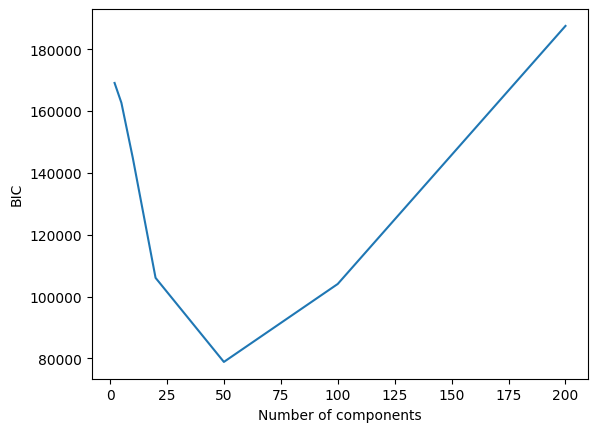

In [26]:
# fit Guassian Mixture Model
from sklearn.mixture import GaussianMixture

# we will find the best k
n_components = [2,5,10,20,50,100,200]
bic = []
for n in n_components:
    print('computing for n_components = ', n)
    gmm = GaussianMixture(n_components=n, covariance_type='full')
    gmm.fit(df_trait_obs_imputed)
    bic.append(gmm.bic(df_trait_obs_imputed))

# plot the BIC
plt.plot(n_components, bic)
plt.xlabel('Number of components')
plt.ylabel('BIC')



In [ ]:
# show describe of each trait for pred 
print('Predicted traits')
display(df_trait_pred.describe())
display(df_trait_pred.isna().sum()/len(df_trait_pred) * 100)

# show describe of each trait for obs
print('Observed traits')
display(df_trait_obs.describe())
display(df_trait_obs.isna().sum()/len(df_trait_obs) * 100)

Predicted traits


trait,Bark thickness,Crown diameter,Crown height,Leaf K per mass,Leaf N per mass,Leaf P per mass,Leaf Vcmax per dry mass,Leaf area,Leaf density,Leaf thickness,Root depth,Seed dry mass,Specific leaf area,Stem conduit diameter,Stem diameter,Stomatal conductance,Tree height,Wood density
count,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000,54153.000000
mean,4.612673,12.271934,12.185388,9.282450,19.027281,1.071144,0.332259,5645.834739,0.364013,0.234297,4.130452,494.345377,12.308504,30.049666,0.652116,170.892321,27.417437,0.584925
std,4.638152,7.244839,5.274005,3.919657,5.692364,0.465138,0.120526,8287.799067,0.084970,0.086764,6.279353,1595.280473,4.519482,10.156595,0.444408,84.005882,11.290545,0.128247
min,0.346297,2.836172,3.500000,1.039242,4.614377,0.161287,0.075431,6.636638,0.036909,0.060720,0.457200,0.086550,1.453623,8.921209,0.146000,25.417628,6.260000,0.179956
25%,2.218887,7.644717,7.934000,6.585408,14.461229,0.749033,0.257505,908.874425,0.309250,0.180648,1.400000,12.142487,9.282996,22.502593,0.374813,111.084065,20.000000,0.497869
50%,3.418315,10.900000,11.500000,8.639048,18.281723,0.957514,0.325743,3051.945812,0.363668,0.217734,2.700000,56.774600,11.628932,28.271873,0.535000,152.754943,25.668357,0.580791
75%,5.076751,12.713695,15.000000,11.167049,22.495903,1.284725,0.395261,6524.163165,0.421389,0.265765,4.400000,256.670094,14.750396,34.423412,0.791000,205.670922,33.750000,0.671181
max,42.696171,40.000000,41.300000,27.428870,43.501226,3.895317,0.920920,108949.928379,0.738055,1.210957,60.000000,41832.440705,38.463928,72.703525,6.480000,715.187299,119.800000,1.158583


trait
Bark thickness             0.0
Crown diameter             0.0
Crown height               0.0
Leaf K per mass            0.0
Leaf N per mass            0.0
Leaf P per mass            0.0
Leaf Vcmax per dry mass    0.0
Leaf area                  0.0
Leaf density               0.0
Leaf thickness             0.0
Root depth                 0.0
Seed dry mass              0.0
Specific leaf area         0.0
Stem conduit diameter      0.0
Stem diameter              0.0
Stomatal conductance       0.0
Tree height                0.0
Wood density               0.0
dtype: float64

Observed traits


trait,Bark thickness,Leaf K per mass,Leaf N per mass,Leaf P per mass,Leaf Vcmax per dry mass,Leaf area,Leaf density,Leaf thickness,Seed dry mass,Specific leaf area,Stem conduit diameter,Stomatal conductance,Wood density
count,1134.000000,1587.000000,4777.000000,3165.000000,550.000000,733.000000,1566.000000,1942.000000,5468.000000,4896.000000,259.000000,915.000000,7491.000000
mean,8.064353,9.710568,20.135614,1.233714,0.363542,12704.962476,0.398406,0.240722,805.846439,13.554671,29.364416,205.854663,0.611436
std,10.820866,6.158211,7.385075,0.853508,0.237129,25135.368273,0.136794,0.142573,4165.297071,7.069314,19.990754,173.457119,0.167942
min,0.204571,0.250000,3.400000,0.056725,0.031784,1.000000,0.020062,0.035253,0.050000,0.508000,7.300000,5.219897,0.080000
25%,2.297900,5.516268,14.747000,0.685340,0.210255,1505.133041,0.312323,0.165281,6.490607,8.603912,15.439765,95.000000,0.492163
50%,4.761102,8.120309,19.290403,1.007081,0.315832,4845.773480,0.392030,0.213100,35.969104,12.422202,23.311399,149.755623,0.603676
75%,7.675052,12.301229,24.505220,1.525592,0.446798,12667.686970,0.470704,0.278720,224.437500,17.106214,37.083200,256.209901,0.724572
max,137.250000,58.800000,51.780000,9.700000,2.207928,337534.790000,1.423935,3.030000,117210.000000,76.791054,124.000000,1192.000000,1.390000


trait
Bark thickness             90.997857
Leaf K per mass            87.401762
Leaf N per mass            62.078273
Leaf P per mass            74.874970
Leaf Vcmax per dry mass    95.633881
Leaf area                  94.181154
Leaf density               87.568469
Leaf thickness             84.583631
Seed dry mass              56.592840
Specific leaf area         61.133603
Stem conduit diameter      97.943955
Stomatal conductance       92.736366
Wood density               40.533460
dtype: float64

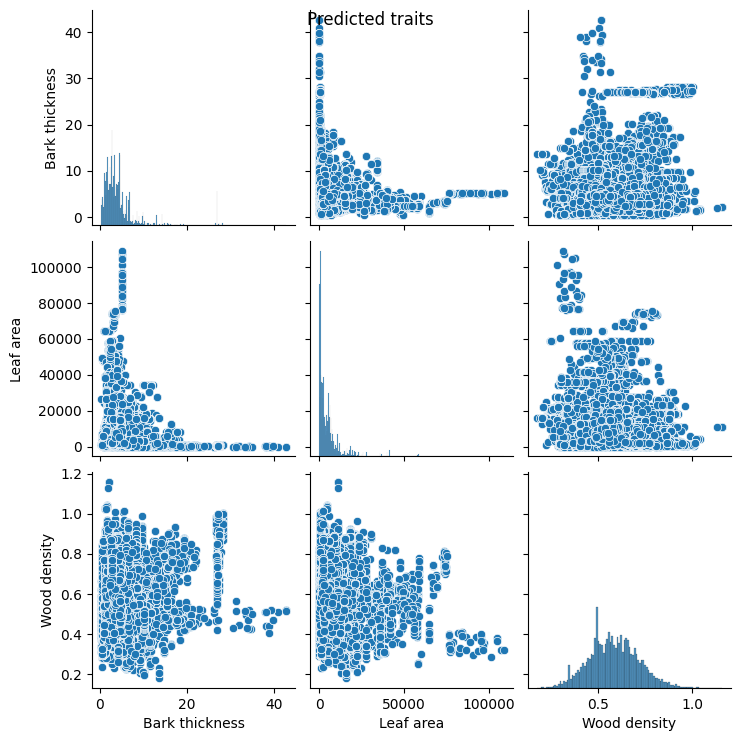

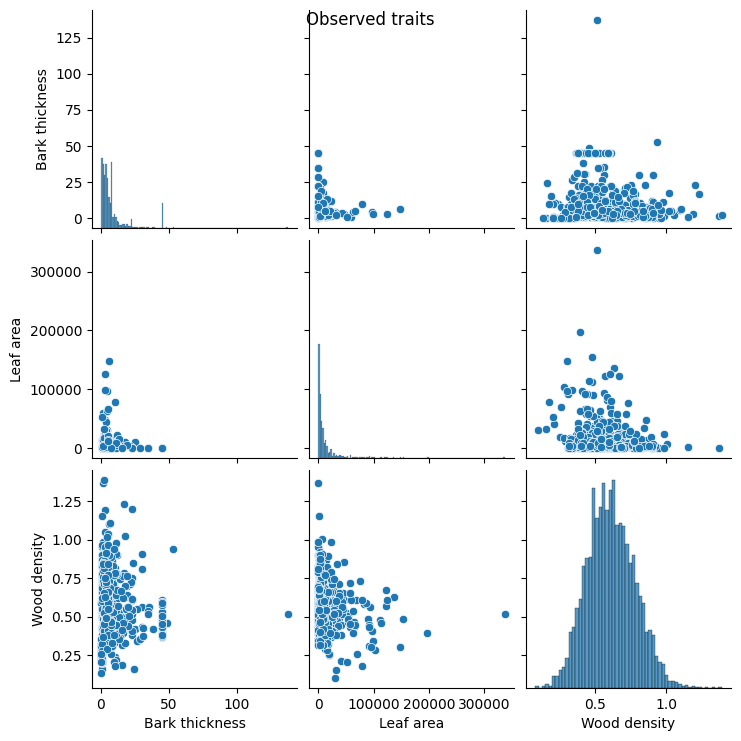

In [ ]:
# graph
import seaborn as sns
import matplotlib.pyplot as plt

some_traits = ['Bark thickness', 'Leaf area', 'Wood density']


sns.pairplot(df_trait_pred[some_traits])
plt.suptitle('Predicted traits')
plt.show()

sns.pairplot(df_trait_obs[some_traits])
plt.suptitle('Observed traits')
plt.show()